In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
train=pd.read_csv('SalaryData_Train.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
test=pd.read_csv('SalaryData_Test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [7]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [13]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

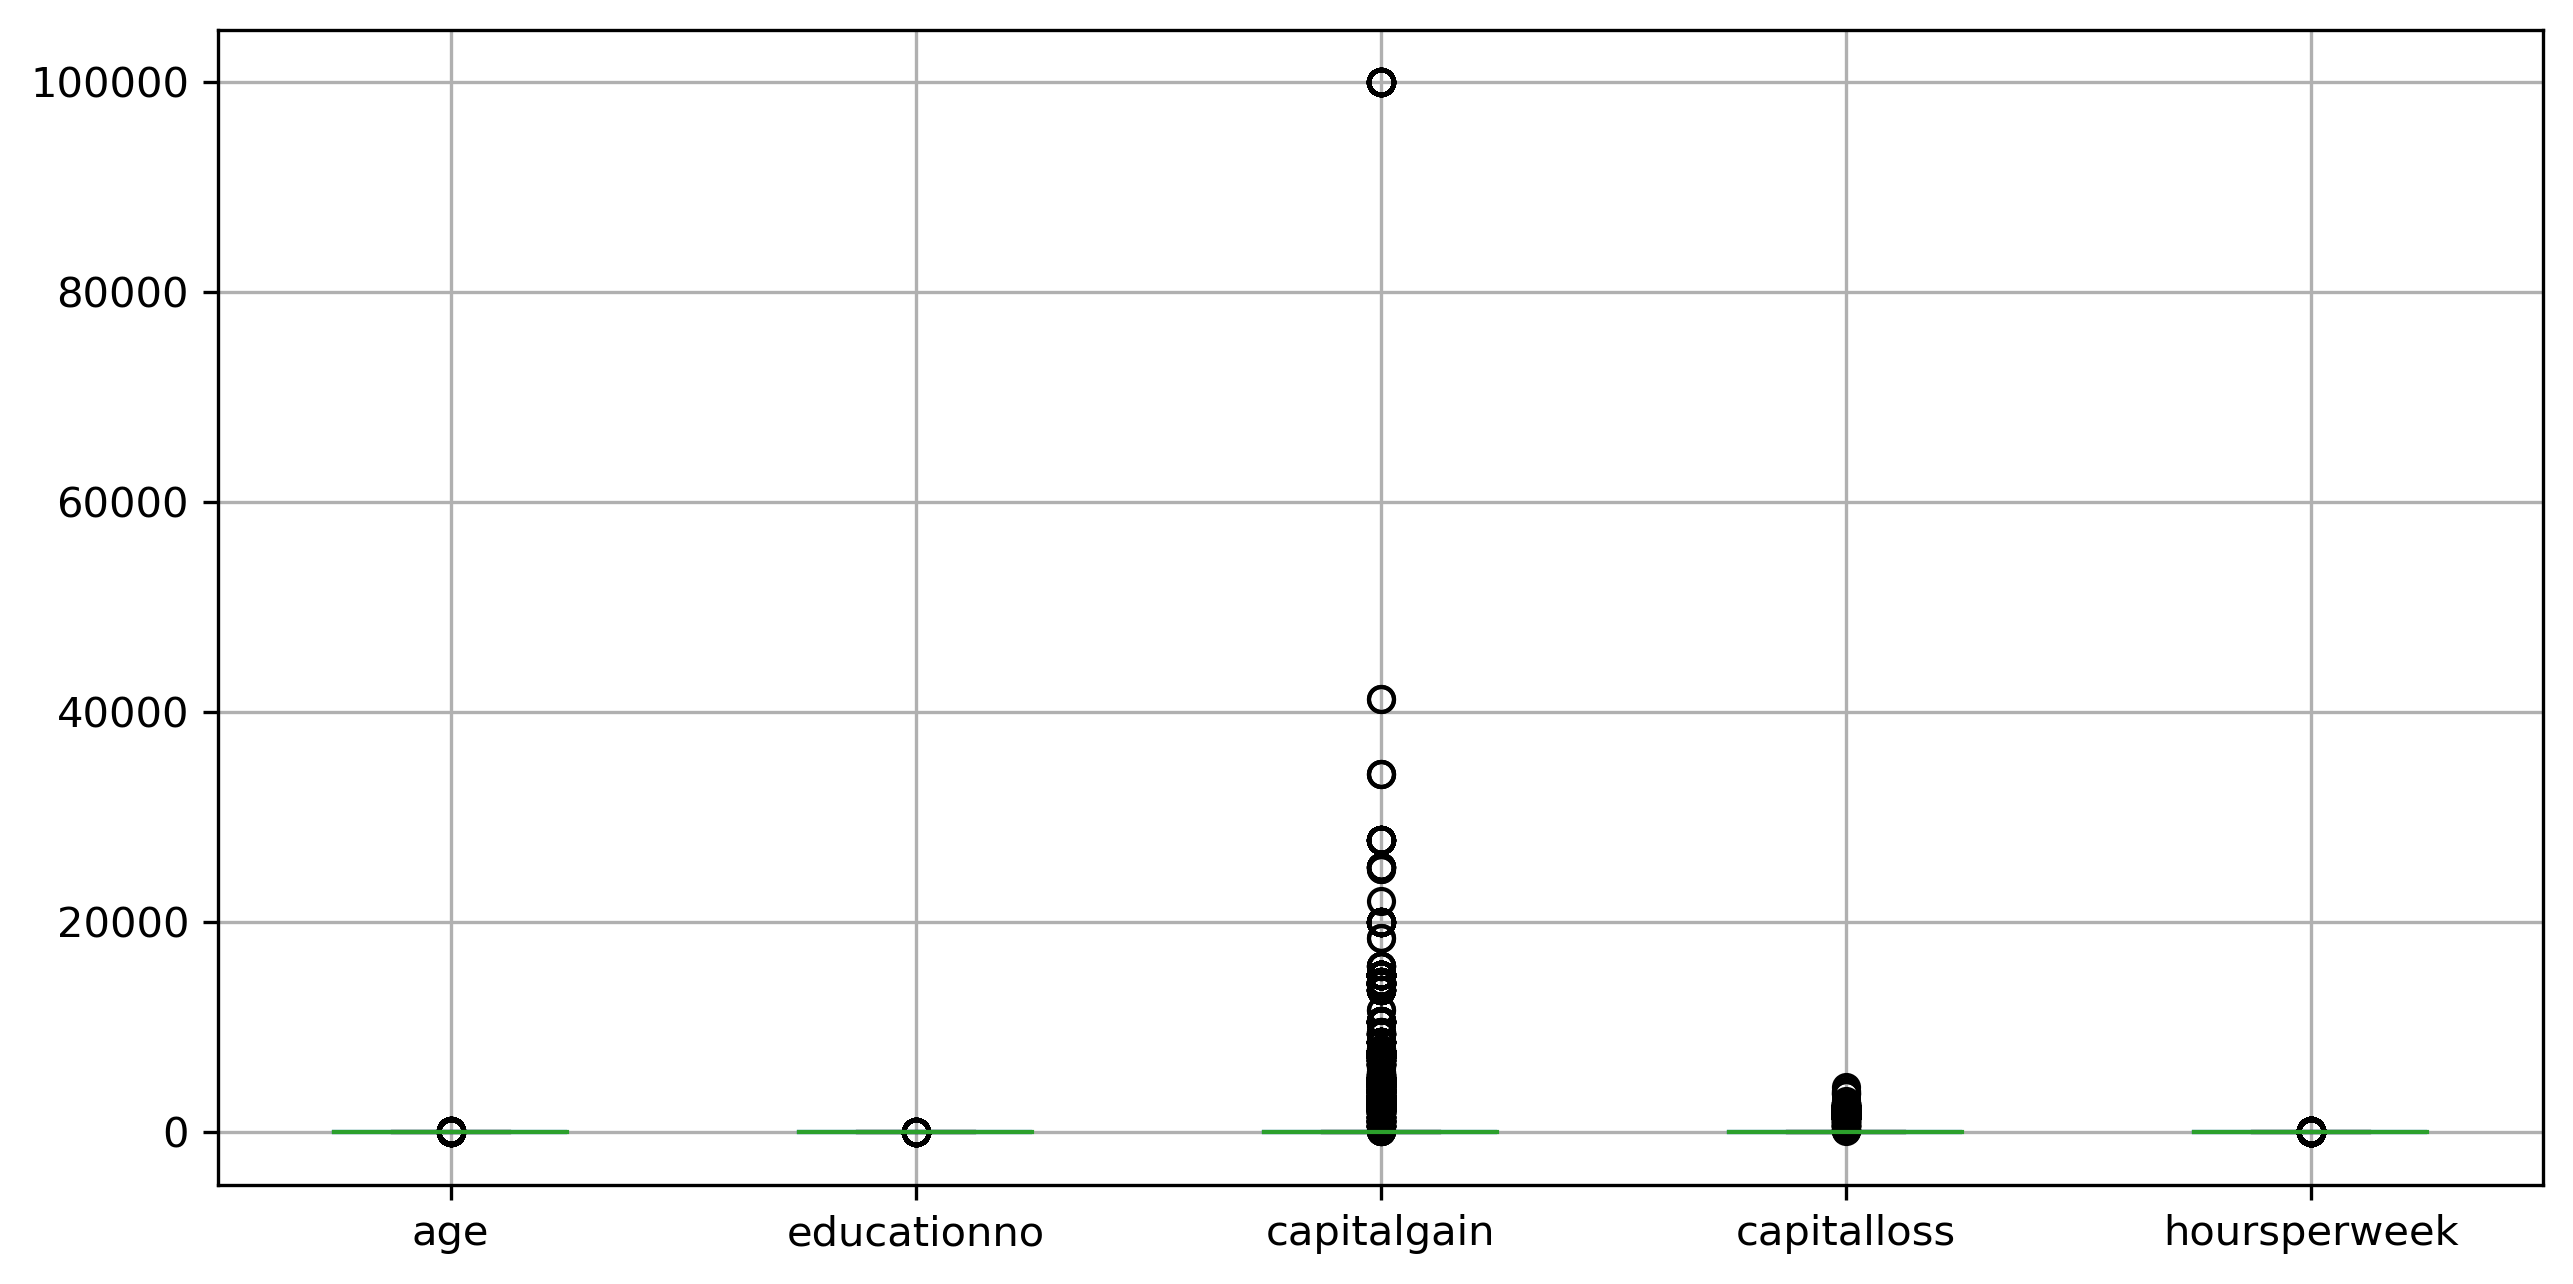

In [15]:
train.boxplot()

In [16]:
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper 

In [18]:
outlier_detection(train,'capitalgain')

(0.0, 0.0)

In [21]:
train.loc[:,'capitalgain':'capitalloss']=train.loc[:,'capitalgain':'capitalloss'].replace(0,np.nan)

In [22]:
train.isna().sum()

age                  0
workclass            0
education            0
educationno          0
maritalstatus        0
occupation           0
relationship         0
race                 0
sex                  0
capitalgain      27623
capitalloss      28735
hoursperweek         0
native               0
Salary               0
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer

In [27]:
si=SimpleImputer(strategy='median')

In [28]:
train.loc[:,'capitalgain':'capitalloss'] = si.fit_transform(train.loc[:,'capitalgain':'capitalloss'])

In [29]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

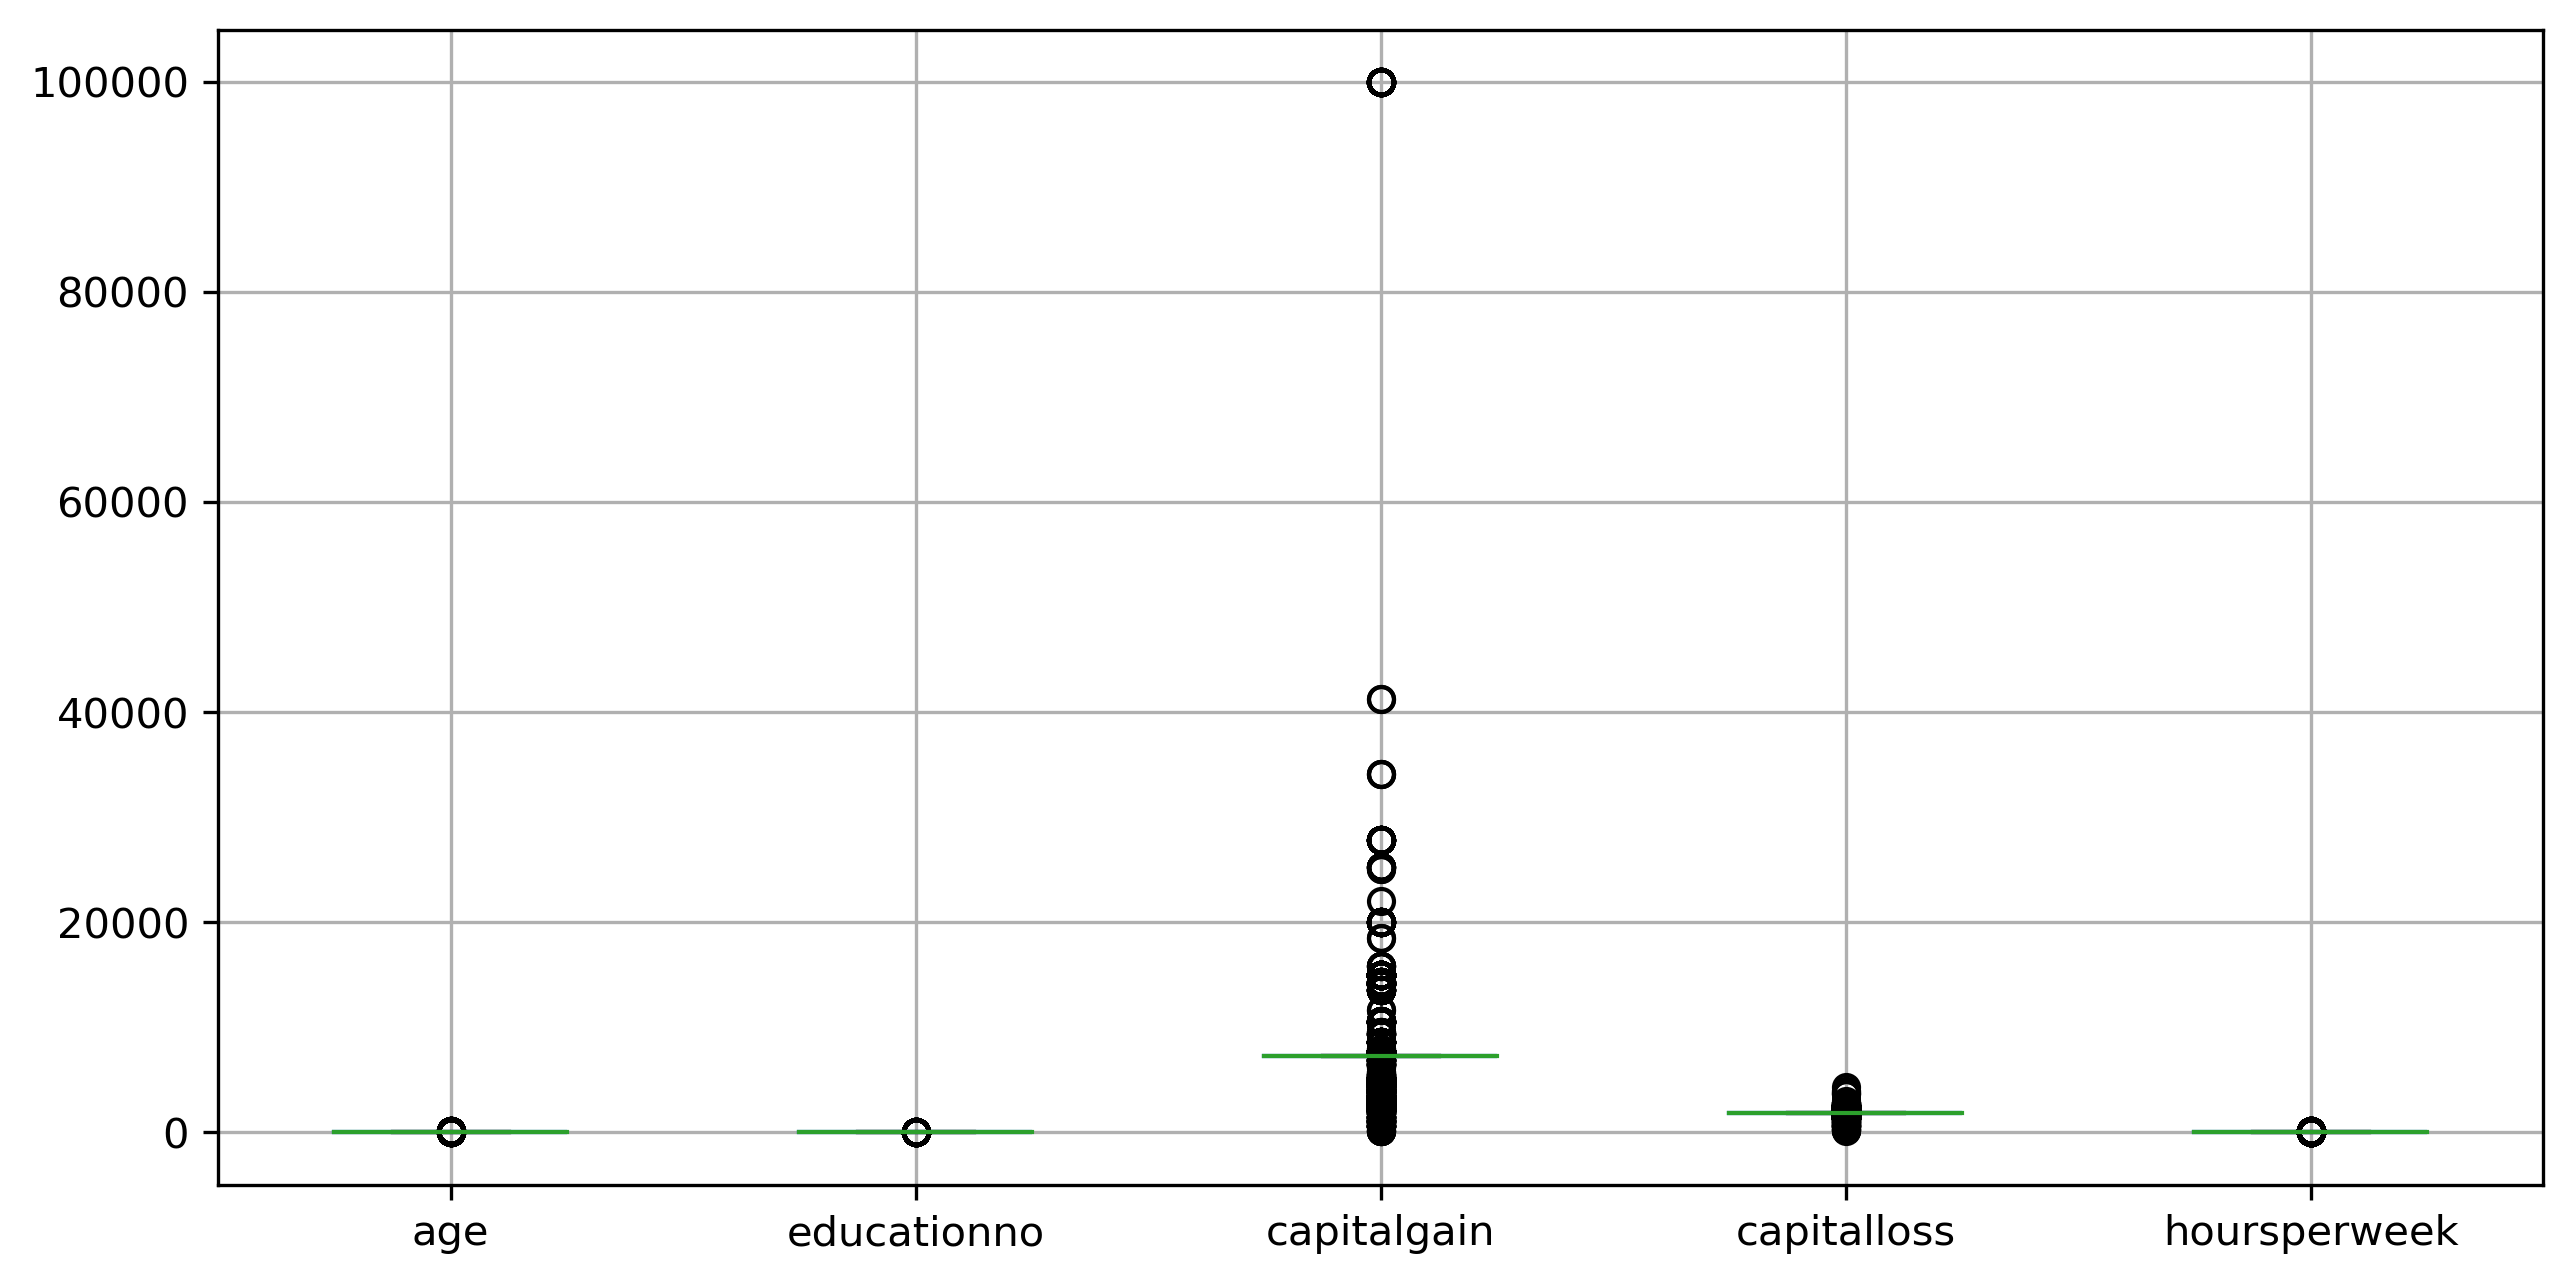

In [30]:
train.boxplot()

In [31]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,7775.929014,1886.085707,40.931269
std,13.134830,2.550037,6660.471477,78.766148,11.980182
min,17.000000,1.000000,114.000000,155.000000,1.000000
25%,28.000000,9.000000,7298.000000,1887.000000,40.000000
50%,37.000000,10.000000,7298.000000,1887.000000,40.000000
75%,47.000000,13.000000,7298.000000,1887.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [43]:
test.loc[:,'capitalgain':'capitalloss']=test.loc[:,'capitalgain':'capitalloss'].replace(0,np.nan)

In [45]:
test.isna().sum()

age                  0
workclass            0
education            0
educationno          0
maritalstatus        0
occupation           0
relationship         0
race                 0
sex                  0
capitalgain      13808
capitalloss      14347
hoursperweek         0
native               0
Salary               0
dtype: int64

In [46]:
test.loc[:,'capitalgain':'capitalloss']=si.fit_transform(test.loc[:,'capitalgain':'capitalloss'])

In [47]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [48]:
oe=OrdinalEncoder()

In [49]:
cat_col=train.select_dtypes(object).columns

In [50]:
cat_col

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [51]:
train[cat_col]=oe.fit_transform(train[cat_col])

In [53]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174.0,1887.0,40,37.0,0.0
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,7298.0,1887.0,13,37.0,0.0
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,7298.0,1887.0,40,37.0,0.0
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,7298.0,1887.0,40,37.0,0.0
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,7298.0,1887.0,40,4.0,0.0


In [54]:
cat_col1=test.select_dtypes(object).columns

cat_col1

In [56]:
test[cat_col1]=oe.fit_transform(test[cat_col1])

In [57]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2.0,1.0,7,4.0,6.0,3.0,2.0,1.0,7298.0,1902.0,40,37.0,0.0
1,38,2.0,11.0,9,2.0,4.0,0.0,4.0,1.0,7298.0,1902.0,50,37.0,0.0
2,28,1.0,7.0,12,2.0,10.0,0.0,4.0,1.0,7298.0,1902.0,40,37.0,1.0
3,44,2.0,15.0,10,2.0,6.0,0.0,2.0,1.0,7688.0,1902.0,40,37.0,1.0
4,34,2.0,0.0,6,4.0,7.0,1.0,4.0,1.0,7298.0,1902.0,30,37.0,0.0


In [58]:
xtrain=train.iloc[:,:-1]
ytrain=train['Salary']

In [59]:
xtest=test.iloc[:,:-1]
ytest=test['Salary']

# Model building

In [60]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
yp = nb.predict(xtest)

In [61]:
nb.score(xtrain,ytrain)

0.7318722854016777

In [62]:
nb.score(xtest,ytest)

0.7140770252324037